## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0716 06:38:51.414671 16780 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 06:38:51.417628 16780 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 06:38:51.460537 16780 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 06:38:51.461542 16780 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 06:38:51.463503 16780 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8163 - acc: 0.3489 - val_loss: 1.7182 - val_acc: 0.3877
Epoch 2/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6051 - acc: 0.4316 - val_loss: 1.6347 - val_acc: 0.4118
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5168 - acc: 0.4645 - val_loss: 1.5165 - val_acc: 0.4672
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.4504 - acc: 0.4847 - val_loss: 1.4669 - val_acc: 0.4771
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4097 - acc: 0.5001 - val_loss: 1.5001 - val_acc: 0.4621
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.3678 - acc: 0.5136 - val_loss: 1.4496 - val_acc: 0.4860
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3295 - acc: 0.5266 - val_loss: 1.4491 - 

Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7958 - acc: 0.3689 - val_loss: 1.7470 - val_acc: 0.3915
Epoch 3/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7122 - acc: 0.4002 - val_loss: 1.6778 - val_acc: 0.4131
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6534 - acc: 0.4205 - val_loss: 1.6322 - val_acc: 0.4291
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6074 - acc: 0.4359 - val_loss: 1.5914 - val_acc: 0.4389
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5698 - acc: 0.4499 - val_loss: 1.5809 - val_acc: 0.4381
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5356 - acc: 0.4622 - val_loss: 1.5357 - val_acc: 0.4564
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5055 - acc: 0.4725 - val_loss: 1.5132 - val_acc: 0.4605
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 109us/step - loss: 2.0101 - acc: 0.2937 - val_loss: 1.9814 - val_acc: 0.2907
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9571 - acc: 0.3113 - val_loss: 1.9361 - val_acc: 0.3164
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9177 - acc: 0.3272 - val_loss: 1.9027 - val_acc: 0.3317
Epoch 6/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8878 - acc: 0.3395 - val_loss: 1.8770 - val_acc: 0.3402
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8635 - acc: 0.3482 - val_loss: 1.8552 - val_acc: 0.3475
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8435 - acc: 0.3546 - val_loss: 1.8374 - val_acc: 0.3539
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8262 - acc: 0.3597 - val_loss: 1.8216 - val_acc: 0.3604
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 105us/step - loss: 2.2423 - acc: 0.1816 - val_loss: 2.2314 - val_acc: 0.1933
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2240 - acc: 0.1968 - val_loss: 2.2139 - val_acc: 0.2038
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2075 - acc: 0.2093 - val_loss: 2.1980 - val_acc: 0.2141
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1924 - acc: 0.2185 - val_loss: 2.1833 - val_acc: 0.2248
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1783 - acc: 0.2263 - val_loss: 2.1696 - val_acc: 0.2347
Epoch 9/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1651 - acc: 0.2340 - val_loss: 2.1567 - val_acc: 0.2392
Epoch 10/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.1525 - acc: 0.2429 - val_loss: 2.1444 - val_acc: 0.2429
Epoch 11/50
50000/50000 [===================

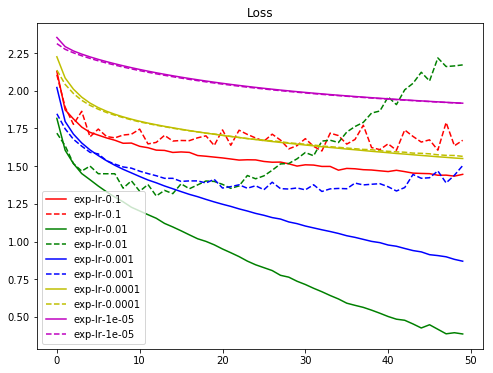

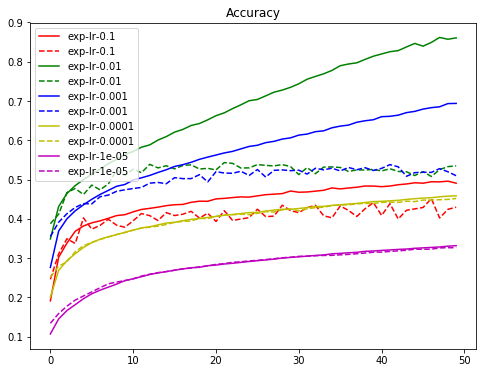

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.75

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9406 - acc: 0.3076 - val_loss: 1.8053 - val_acc: 0.3561
Epoch 2/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7416 - acc: 0.3841 - val_loss: 1.6830 - val_acc: 0.4006
Epoch 3/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6557 - acc: 0.4144 - val_loss: 1.6345 - val_acc: 0.4159
Epoch 4/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5972 - acc: 0.4356 - val_loss: 1.6659 - val_acc: 0.3994
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5615 - acc: 0.4466 - val_loss: 1.5576 - val_acc: 0.4455
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5192 - acc: 0.4620 - val_loss: 1.5377 - val_acc: 0.4462
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4839 - acc: 0.4745 - val_loss: 1.5673 - val_acc: 0.4416
Epoch 8/50
50000/50000 [==========

50000/50000 [==============================] - 5s 108us/step - loss: 1.9791 - acc: 0.3011 - val_loss: 1.9314 - val_acc: 0.3122
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.9064 - acc: 0.3276 - val_loss: 1.8843 - val_acc: 0.3358
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8639 - acc: 0.3437 - val_loss: 1.8453 - val_acc: 0.3531
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.8321 - acc: 0.3559 - val_loss: 1.8207 - val_acc: 0.3648
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8060 - acc: 0.3671 - val_loss: 1.7933 - val_acc: 0.3749
Epoch 7/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.7825 - acc: 0.3755 - val_loss: 1.7729 - val_acc: 0.3810
Epoch 8/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7616 - acc: 0.3840 - val_loss: 1.7588 - val_acc: 0.3899
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 107us/step - loss: 2.2333 - acc: 0.1931 - val_loss: 2.2207 - val_acc: 0.2038
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2091 - acc: 0.2099 - val_loss: 2.1979 - val_acc: 0.2185
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1870 - acc: 0.2235 - val_loss: 2.1769 - val_acc: 0.2361
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1663 - acc: 0.2375 - val_loss: 2.1570 - val_acc: 0.2438
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 2.1469 - acc: 0.2465 - val_loss: 2.1382 - val_acc: 0.2548
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.1286 - acc: 0.2551 - val_loss: 2.1207 - val_acc: 0.2603
Epoch 9/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.1113 - acc: 0.2618 - val_loss: 2.1037 - val_acc: 0.2656
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 105us/step - loss: 2.3023 - acc: 0.0859 - val_loss: 2.2963 - val_acc: 0.0942
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2945 - acc: 0.0946 - val_loss: 2.2893 - val_acc: 0.1045
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2880 - acc: 0.1058 - val_loss: 2.2833 - val_acc: 0.1165
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2824 - acc: 0.1207 - val_loss: 2.2781 - val_acc: 0.1303
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2774 - acc: 0.1318 - val_loss: 2.2734 - val_acc: 0.1437
Epoch 9/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2728 - acc: 0.1417 - val_loss: 2.2690 - val_acc: 0.1505
Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2686 - acc: 0.1494 - val_loss: 2.2650 - val_acc: 0.1566
Epoch 11/50
50000/50000 [===================

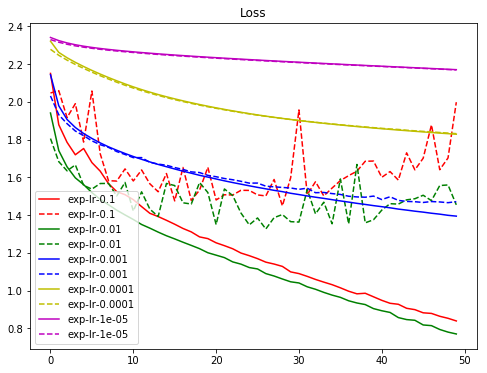

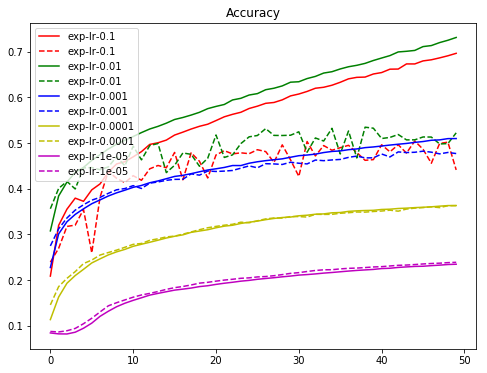

In [11]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 5s 99us/step - loss: 1.9291 - acc: 0.3075 - val_loss: 1.8110 - val_acc: 0.3355
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7379 - acc: 0.3824 - val_loss: 1.7564 - val_acc: 0.3750
Epoch 3/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6512 - acc: 0.4164 - val_loss: 1.6608 - val_acc: 0.4116
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5921 - acc: 0.4374 - val_loss: 1.6232 - val_acc: 0.4314
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5402 - acc: 0.4557 - val_loss: 1.5749 - val_acc: 0.4374
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4992 - acc: 0.4698 - val_loss: 1.5597 - val_acc: 0.4369
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4678 - acc: 0.4790 - val_loss: 1.4807 - val_acc: 0.4723
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9527 - acc: 0.3170 - val_loss: 1.9233 - val_acc: 0.3331
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8977 - acc: 0.3381 - val_loss: 1.8788 - val_acc: 0.3428
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8598 - acc: 0.3496 - val_loss: 1.8447 - val_acc: 0.3535
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8294 - acc: 0.3593 - val_loss: 1.8158 - val_acc: 0.3659
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8031 - acc: 0.3693 - val_loss: 1.7942 - val_acc: 0.3740
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7805 - acc: 0.3801 - val_loss: 1.7766 - val_acc: 0.3757
Epoch 9/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.7604 - acc: 0.3857 - val_loss: 1.7582 - val_acc: 0.3899
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 5s 97us/step - loss: 2.1975 - acc: 0.2207 - val_loss: 2.1837 - val_acc: 0.2285
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1741 - acc: 0.2323 - val_loss: 2.1620 - val_acc: 0.2378
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.1532 - acc: 0.2413 - val_loss: 2.1422 - val_acc: 0.2423
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1339 - acc: 0.2490 - val_loss: 2.1237 - val_acc: 0.2506
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1158 - acc: 0.2560 - val_loss: 2.1062 - val_acc: 0.2568
Epoch 9/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0986 - acc: 0.2603 - val_loss: 2.0897 - val_acc: 0.2633
Epoch 10/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0825 - acc: 0.2678 - val_loss: 2.0740 - val_acc: 0.2675
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 5s 96us/step - loss: 2.2995 - acc: 0.1188 - val_loss: 2.2967 - val_acc: 0.1197
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2933 - acc: 0.1221 - val_loss: 2.2909 - val_acc: 0.1252
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2875 - acc: 0.1257 - val_loss: 2.2855 - val_acc: 0.1306
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2821 - acc: 0.1306 - val_loss: 2.2804 - val_acc: 0.1349
Epoch 9/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2770 - acc: 0.1353 - val_loss: 2.2755 - val_acc: 0.1407
Epoch 10/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2721 - acc: 0.1412 - val_loss: 2.2707 - val_acc: 0.1454
Epoch 11/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2673 - acc: 0.1470 - val_loss: 2.2661 - val_acc: 0.1484
Epoch 12/50
50000/50000 [=========================

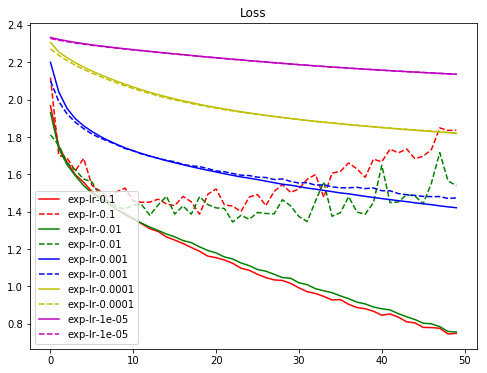

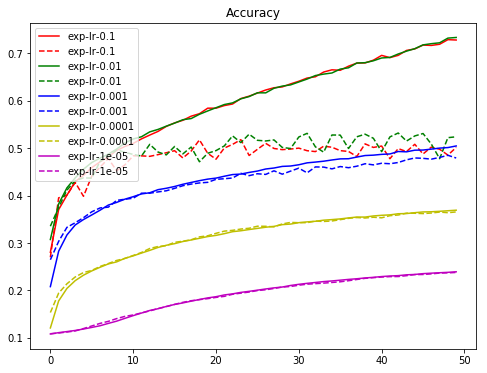

In [13]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
